# PyTorch Geometric Introduction

A small overview on how to load graph data with PyTorch Geometric

In [1]:
import torch
import networkx as nx
from torch_geometric.data import Data
from torch_geometric.utils.convert import to_networkx

# watch for any changes in model.py, if it changes, re-load it automatically
%load_ext autoreload
%autoreload 2

C:\Users\tilof\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\cuda\__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ..\c10\cuda\CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


## Definition of a graph

In [2]:
# A graph with four nodes
edge_list = torch.tensor([
    [0, 0, 0, 1, 2, 2, 3, 3], # Source nodes
    [1, 2, 3, 0, 0, 3, 2, 0], # Target nodes
], dtype=torch.long)

# Six features for each node
node_features = torch.tensor([
    [-8, 1, 5, 8, 2, -3], # features of node 0
    [-1, 0, 2, -3, 0, 1], # features of node 1
    [1, -1, 0, -1, 2, 1], # features of node 2
    [0, 1, 4, -2, 3, 4], # features of node 3
], dtype=torch.long)

# One weight for each edge
edge_weight = torch.tensor([
    [35.], # weights for edge 0: (0,1)
    [48.], # weights for edge 1: (0,2)
    [12.], # weights for edge 2: (0,3)
    [10.], # weights for edge 3: (1,0)
    [70.], # weights for edge 4: (2,0)
    [5.], # weights for edge 5: (2,3)
    [15.], # weights for edge 6: (3,2)
    [8.], # weights for edge 7: (3,0)
], dtype=torch.long)

### Use PyTorch Geometric package to create a Data object

In [3]:
# Create a Data object representing the graph
data = Data(x=node_features, edge_index=edge_list, edge_attr=edge_weight)

# Number of nodes
print("Number of nodes", data.num_nodes)

# Number of edges
print("Number of edges", data.num_edges)

# Number of node features
print("Number of ndoe features", data.num_node_features)

# Numbder of edge features
print("Number of edge features", data.num_edge_features)

Number of nodes 4
Number of edges 8
Number of ndoe features 6
Number of edge features 1


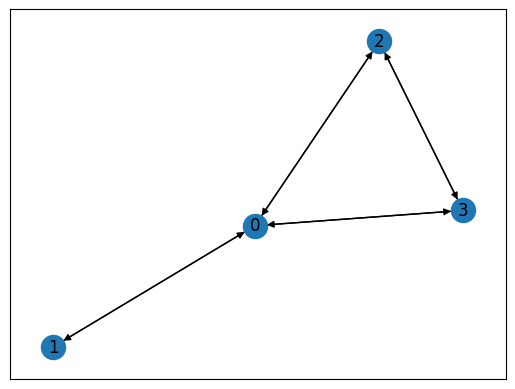

In [4]:
G = to_networkx(data)
nx.draw_networkx(G)